## Import Necessary Libraries

In [169]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Import Dataset

In [78]:
# Import Dataset
df = pd.read_csv("Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [79]:
# Checking size of dataset
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

Number of Rows: 8128
Number of Columns: 13


## Identifying Missing Data and Outliers.

In [80]:
# Checking Datatypes of each column
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [81]:
# Checking if there are any outliers in "fuel" column
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [82]:
# Checking if there are any outliers in "seller_type" column
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [83]:
# Checking if there are any outliers in "transmission" column
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [84]:
# Checking if there are any outliers in "owner" column
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [85]:
# Checking if there are any outliers in "mileage" column
df["mileage"].sort_values().unique()

array(['0.0 kmpl', '10.0 kmpl', '10.1 kmpl', '10.5 kmpl', '10.71 kmpl',
       '10.75 kmpl', '10.8 kmpl', '10.9 km/kg', '10.9 kmpl', '10.91 kmpl',
       '10.93 kmpl', '11.0 kmpl', '11.07 kmpl', '11.1 kmpl', '11.18 kmpl',
       '11.2 kmpl', '11.3 kmpl', '11.36 kmpl', '11.4 kmpl', '11.45 kmpl',
       '11.5 kmpl', '11.57 kmpl', '11.68 kmpl', '11.7 kmpl', '11.72 kmpl',
       '11.74 kmpl', '11.79 kmpl', '11.8 kmpl', '11.88 km/kg',
       '11.9 kmpl', '11.96 kmpl', '12.0 kmpl', '12.05 kmpl', '12.07 kmpl',
       '12.08 kmpl', '12.1 kmpl', '12.12 kmpl', '12.2 kmpl', '12.3 kmpl',
       '12.4 kmpl', '12.5 kmpl', '12.55 kmpl', '12.6 kmpl', '12.62 kmpl',
       '12.7 kmpl', '12.8 kmpl', '12.83 kmpl', '12.85 kmpl', '12.9 kmpl',
       '12.99 kmpl', '13.0 kmpl', '13.01 kmpl', '13.1 kmpl', '13.2 km/kg',
       '13.2 kmpl', '13.22 kmpl', '13.24 kmpl', '13.38 kmpl', '13.4 kmpl',
       '13.44 kmpl', '13.45 km/kg', '13.49 kmpl', '13.5 kmpl',
       '13.55 kmpl', '13.58 kmpl', '13.6 kmpl', '13.68 k

"Mileage" column has "0.0 kmpl". So we will make it as NAN.

In [86]:
# Replacing "0.0 kmpl" with Nan.
df["mileage"] = df["mileage"].replace({"0.0 kmpl" : np.nan})

In [87]:
# Checking if there are any outliers in "engine" column
df["engine"].sort_values().unique()

array(['1047 CC', '1061 CC', '1086 CC', '1120 CC', '1150 CC', '1172 CC',
       '1186 CC', '1193 CC', '1194 CC', '1196 CC', '1197 CC', '1198 CC',
       '1199 CC', '1248 CC', '1298 CC', '1299 CC', '1339 CC', '1341 CC',
       '1343 CC', '1364 CC', '1368 CC', '1373 CC', '1388 CC', '1390 CC',
       '1396 CC', '1399 CC', '1405 CC', '1422 CC', '1451 CC', '1461 CC',
       '1462 CC', '1489 CC', '1493 CC', '1495 CC', '1496 CC', '1497 CC',
       '1498 CC', '1499 CC', '1527 CC', '1582 CC', '1586 CC', '1590 CC',
       '1591 CC', '1595 CC', '1596 CC', '1597 CC', '1598 CC', '1599 CC',
       '1781 CC', '1794 CC', '1795 CC', '1796 CC', '1797 CC', '1798 CC',
       '1799 CC', '1896 CC', '1948 CC', '1950 CC', '1956 CC', '1968 CC',
       '1969 CC', '1984 CC', '1991 CC', '1994 CC', '1995 CC', '1997 CC',
       '1998 CC', '1999 CC', '2092 CC', '2143 CC', '2148 CC', '2179 CC',
       '2197 CC', '2198 CC', '2199 CC', '2200 CC', '2231 CC', '2354 CC',
       '2359 CC', '2362 CC', '2393 CC', '2446 CC', 

In [88]:
# Checking if there are any outliers in "max_power" column
df["max_power"].sort_values().unique()

array([' bhp', '0', '100 bhp', '100.5 bhp', '100.57 bhp', '100.6 bhp',
       '101 bhp', '102 bhp', '102.5 bhp', '103 bhp', '103.2 bhp',
       '103.25 bhp', '103.26 bhp', '103.3 bhp', '103.5 bhp', '103.52 bhp',
       '103.6 bhp', '104 bhp', '104.5 bhp', '104.55 bhp', '104.68 bhp',
       '105 bhp', '105.3 bhp', '105.5 bhp', '106 bhp', '108.45 bhp',
       '108.495 bhp', '108.5 bhp', '108.6 bhp', '108.62 bhp', '110 bhp',
       '110.4 bhp', '110.5 bhp', '112 bhp', '112.2 bhp', '113.4 bhp',
       '113.42 bhp', '115 bhp', '116.3 bhp', '116.4 bhp', '116.6 bhp',
       '116.9 bhp', '117.3 bhp', '117.6 bhp', '118 bhp', '118.3 bhp',
       '118.35 bhp', '120 bhp', '120.69 bhp', '120.7 bhp', '121 bhp',
       '121.3 bhp', '121.31 bhp', '121.36 bhp', '121.4 bhp', '122.4 bhp',
       '123.37 bhp', '123.7 bhp', '125 bhp', '126.2 bhp', '126.24 bhp',
       '126.3 bhp', '126.32 bhp', '127 bhp', '130 bhp', '132 bhp',
       '134 bhp', '134.10 bhp', '135.1 bhp', '136 bhp', '138 bhp',
       '138.0

"max_power" column has " bhp" and "0" as outliers. we will replace it with NAN.

In [89]:
# Replacing " bhp" and "0" with Nan.
df["max_power"] = df["max_power"].replace({" bhp" : np.nan, "0" : np.nan})

In [90]:
# Checking if there are any outliers in "max_power" column
df["torque"].sort_values().unique()

array(['10.2@ 2,600(kgm@ rpm)', '10.4@ 3,200(kgm@ rpm)',
       '10.7@ 2,500(kgm@ rpm)', '10.7@ 2,600(kgm@ rpm)', '100Nm@ 2700rpm',
       '101Nm@ 3000rpm', '102Nm@ 2600rpm', '102Nm@ 4000rpm',
       '103Nm@ 4500rpm', '104Nm@ 3100rpm', '104Nm@ 4000rpm',
       '104Nm@ 4400rpm', '106.5Nm@ 4400rpm', '106Nm@ 2200rpm',
       '108.5Nm@ 5000rpm', '108Nm@ 4400rpm', '109Nm@ 4500rpm',
       '11.2@ 4,400(kgm@ rpm)', '11.3kgm@ 4700rpm',
       '11.4 kgm at 4,000 rpm', '11.4@ 4,000(kgm@ rpm)',
       '11.5@ 4,500(kgm@ rpm)', '11.8@ 3,200(kgm@ rpm)',
       '110(11.2)@ 4800', '110@ 3,000(kgm@ rpm)', '110Nm@ 3000-4300rpm',
       '110Nm@ 3000rpm', '110Nm@ 3750rpm', '110Nm@ 4000rpm',
       '110Nm@ 4400rpm', '110Nm@ 4500rpm', '110Nm@ 4800rpm',
       '111.7Nm@ 4000rpm', '111.8Nm@ 4000rpm', '112Nm@ 4000rpm',
       '113.75Nm@ 4000rpm', '113.75nm@ 4000rpm', '113.7Nm@ 4000rpm',
       '113.8Nm@ 4000rpm', '113Nm@ 3300rpm', '113Nm@ 4,500rpm',
       '113Nm@ 4200rpm', '113Nm@ 4400rpm', '113Nm@ 4500rpm',


In [91]:
# Cheching for null values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          238
engine           221
max_power        222
torque           222
seats            221
dtype: int64

We have null values in mileage, engine, max_power, torque, seats columns

## Data Preprocessing

In [92]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [93]:
# Filling NaN vales with word "missing"
df = df.fillna(value = "missing")

In [94]:
# Taking all car brands by splitting name column into list and taking 1st element in the list.
car_brands = []
for i in df["name"]:
    car_brands.append(i.split()[0]) # ["Maruti", "Swift", "Dzire", "VDI"] ==> "Maruti".
car_brands                          # Appending extracted car brand to car_brand list.

['Maruti',
 'Skoda',
 'Honda',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Toyota',
 'Ford',
 'Renault',
 'Maruti',
 'Maruti',
 'Maruti',
 'Maruti',
 'Mahindra',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Hyundai',
 'Mahindra',
 'Honda',
 'Maruti',
 'Maruti',
 'Tata',
 'Maruti',
 'Maruti',
 'Chevrolet',
 'Maruti',
 'Maruti',
 'Maruti',
 'Fiat',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Datsun',
 'Tata',
 'Maruti',
 'Jeep',
 'Honda',
 'Honda',
 'Maruti',
 'Maruti',
 'Maruti',
 'Toyota',
 'Toyota',
 'Mercedes-Benz',
 'Honda',
 'Mitsubishi',
 'Honda',
 'Maruti',
 'Honda',
 'Toyota',
 'Toyota',
 'Audi',
 'Toyota',
 'Audi',
 'Mercedes-Benz',
 'Tata',
 'Hyundai',
 'Hyundai',
 'Maruti',
 'Ford',
 'Maruti',
 'Volkswagen',
 'Honda',
 'Maruti',
 'Volkswagen',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Maruti',
 'Toyota',
 'Maruti',
 'Maruti',
 'Tata',
 'Volkswagen',
 'Toyota',
 'Ford',
 'BMW',
 'Maruti',
 'Datsun',
 'Maruti',
 'Maruti',
 'Maruti',
 'Hyundai',
 'Marut

In [95]:
# Inserting column called "car_brand" beside "name" column.
df.insert(1, "car_brand", car_brands)

In [96]:
df.head()

,name,car_brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [97]:
df["car_brand"].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Opel                1
Peugeot             1
Ashok               1
Name: car_brand, dtype: int64

In [98]:
# Dropping the "name" column as we extracted car brand from name.
df = df.drop(columns = ["name"])
df.head()

,car_brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [99]:
# Adding "no_years" column by substracting year from current year.
df.insert(2, "no_year", 2021 - df["year"])

In [100]:
df.head()

,car_brand,year,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda,2014,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda,2006,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai,2010,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti,2007,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [101]:
# Dropping "year" column
df = df.drop(columns = ["year"])
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [102]:
# Using Regular expression to extract numbers from the mileage column and taking them in a list "mileage_kmpl"
mileage_kmpl = []
for i in df["mileage"]:
    if i == "missing":
        mileage_kmpl.append("missing")
    else:    
        x = re.findall("[0-9]+[.][0-9]+", i)
        mileage_kmpl.append(x[0])
print(mileage_kmpl[0:5])

['23.4', '21.14', '17.7', '23.0', '16.1']


In [103]:
# Inserting column "mileage(kmpl)" beside "mileage column".
df.insert(9, "mileage(kmpl)", mileage_kmpl)
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,mileage(kmpl),engine,max_power,torque,seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [104]:
# Dropping "mileage" column
df = df.drop(columns = ["mileage"])
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine,max_power,torque,seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [105]:
# Using Regular expression to extract numbers from the "engine" column and taking them in a list "engine_cc".
engine_cc = []
for i in df["engine"]:
    if i == "missing":
        engine_cc.append(i)
    else:
        x = re.findall("[0-9]+", i)
        engine_cc.append(x[0])
print(engine_cc[0:5])  

['1248', '1498', '1497', '1396', '1298']


In [106]:
# Inserting "engine(cc) column beside "engine" column.
df.insert(10, "engine(CC)", engine_cc)
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine,engine(CC),max_power,torque,seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,1248,74 bhp,190Nm@ 2000rpm,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,1498,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,1396,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [107]:
# Dropping "engine" column
df = df.drop(columns = ["engine"])
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power,torque,seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74 bhp,190Nm@ 2000rpm,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [108]:
# Using Regular expression to extract numbers from the "max_power" column and taking them in a list "max_power_bhp".
max_power_bhp = []
for i in df["max_power"]:
    if i == "missing":
        max_power_bhp.append(i)
    else:    
        x = re.findall("[0-9.]+", i)
        max_power_bhp.append(x[0])
max_power_bhp[0:5]

['74', '103.52', '78', '90', '88.2']

In [109]:
# Inserting "max_power(BHP)" column beside "max_power" column.
df.insert(11, "max_power(BHP)", max_power_bhp)
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power,max_power(BHP),torque,seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74 bhp,74,190Nm@ 2000rpm,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,103.52,250Nm@ 1500-2500rpm,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78 bhp,78,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90 bhp,90,22.4 kgm at 1750-2750rpm,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2 bhp,88.2,"11.5@ 4,500(kgm@ rpm)",5


In [110]:
# Dropping "max_power" column.
df = df.drop(columns = ["max_power"])
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(BHP),torque,seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5


In [111]:
# Using Regular expression to extract only torque(Nm) from the "torque" column and taking them in a list "torque_nm".
torque_nm = []
for i in df["torque"]:
    if i == "missing":
        torque_nm.append(i)
    else:    
        if re.search("kgm", i):
            x = re.findall("[0-9.]+", i)
            torque_nm.append(round(float(x[0]) * 9.8, 2)) # Multiplying with 9.8 to convert kgm to Nm.
        else:
            y = re.findall("[0-9.]+", i)
            torque_nm.append(float(y[0]))
torque_nm[0:5]

[190.0, 250.0, 124.46, 219.52, 112.7]

In [112]:
# Insering "torque(Nm)" beside torque column.
df.insert(12, "torque(Nm)", torque_nm)
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(BHP),torque,torque(Nm),seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,190,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,250,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",124.46,5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,219.52,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",112.7,5


In [113]:
# Using Regular expression to extract only lower limit from the "torque" column and taking them in a list "torque_rpm_lower".
torque_rpm_lower = []
for i in df["torque"]:
    if i == "missing":
        torque_rpm_lower.append(i)
    else:    
        x = re.findall("[0-9,.]+", i)
        if len(x) == 3:
            torque_rpm_lower.append(x[1]) # [430, 1750, 2250] ==> gives index 1 element 1750.
        elif len(x) == 2:
            torque_rpm_lower.append(x[1]) # [110, 4800] ==> gives index 1 element 4800.
        else:
            torque_rpm_lower.append("missing") # because of there are some observation in torque column like "400Nm" with no RPM.
torque_rpm_lower[0:5]     

['2000', '1500', '2,700', '1750', '4,500']

In [114]:
# Inserting "torque_lower(rpm)" column beside "torque" column
df.insert(13, "torque_lower(rpm)", torque_rpm_lower)
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(BHP),torque,torque(Nm),torque_lower(rpm),seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,190,2000,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,250,1500,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",124.46,"2,700",5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,219.52,1750,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",112.7,"4,500",5


In [115]:
# Using Regular expression to extract only Upper limit from the "torque" column and taking them in a list "torque_rpm_upper".
torque_rpm_upper = []
for i in df["torque"]:
    if i == "missing":
        torque_rpm_upper.append(i)
    else:    
        x = re.findall("[0-9,.]+", i)
        if len(x) == 3:
            torque_rpm_upper.append(x[2]) # [430, 1750, 2250] ==> gives index 2 element 2250.
        elif len(x) == 2:
            torque_rpm_upper.append(x[1]) # [110, 4800] ==> gives index 1 element 4800.
        else:
            torque_rpm_upper.append("missing")
torque_rpm_upper[0:5]

['2000', '2500', '2,700', '2750', '4,500']

In [116]:
# Inserting "torque_upper(rpm)" column beside "torque" column
df.insert(14, "torque_upper(rpm)", torque_rpm_upper)
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(BHP),torque,torque(Nm),torque_lower(rpm),torque_upper(rpm),seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,190,2000,2000,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,250,1500,2500,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",124.46,"2,700","2,700",5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,219.52,1750,2750,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",112.7,"4,500","4,500",5


In [117]:
# Dropping "torque" Column.
df = df.drop(columns = ["torque"])
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(BHP),torque(Nm),torque_lower(rpm),torque_upper(rpm),seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190,2000,2000,5
1,Skoda,7,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250,1500,2500,5
2,Honda,15,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,124.46,"2,700","2,700",5
3,Hyundai,11,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,219.52,1750,2750,5
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,112.7,"4,500","4,500",5


In [118]:
# Converting word "missing" to Nan.
df = df.replace({"missing" : np.nan})
df.isnull().sum()

car_brand              0
no_year                0
selling_price          0
km_driven              0
fuel                   0
seller_type            0
transmission           0
owner                  0
mileage(kmpl)        238
engine(CC)           221
max_power(BHP)       222
torque(Nm)           222
torque_lower(rpm)    256
torque_upper(rpm)    256
seats                221
dtype: int64

In [119]:
# Viewing datatypes after extracting the required numbers.
df.dtypes

car_brand             object
no_year                int64
selling_price          int64
km_driven              int64
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage(kmpl)         object
engine(CC)            object
max_power(BHP)        object
torque(Nm)           float64
torque_lower(rpm)     object
torque_upper(rpm)     object
seats                float64
dtype: object

In [120]:
# Converting "mileage(kmpl)" column to numeric column
df["mileage(kmpl)"] = pd.to_numeric(df["mileage(kmpl)"])
df["mileage(kmpl)"].dtype

dtype('float64')

In [121]:
# Converting "engine(CC)" column to numeric column
df["engine(CC)"] = pd.to_numeric(df["engine(CC)"])
df["engine(CC)"].dtype

dtype('float64')

In [122]:
# Converting "max_power(BHP)" column to numeric column
df["max_power(BHP)"] = pd.to_numeric(df["max_power(BHP)"])
df["max_power(BHP)"].dtype

dtype('float64')

In [123]:
# Converting "torque(Nm)" column to numeric column
df["torque(Nm)"] = pd.to_numeric(df["torque(Nm)"])
df["torque(Nm)"].dtype

dtype('float64')

we could not convert to numeric because there are ","s in column like "2,700".
<br>so, lets remove that ","

In [124]:
# Removing "," and taking in separate list.
df["torque_lower(rpm)"] = df["torque_lower(rpm)"].replace(to_replace = ",", value = "", regex = True)
df["torque_upper(rpm)"] = df["torque_upper(rpm)"].replace(to_replace = ",", value = "", regex = True)

In [125]:
# Converting "torque_lower(rpm)" column to numeric column.
df["torque_lower(rpm)"] = pd.to_numeric(df["torque_lower(rpm)"])
df["torque_lower(rpm)"].dtype

dtype('float64')

In [126]:
# Converting "torque_upper(rpm)" column to numeric column.
df["torque_upper(rpm)"] = pd.to_numeric(df["torque_upper(rpm)"])
df["torque_upper(rpm)"].dtype

dtype('float64')

In [127]:
# Viewing the data types
df.dtypes

car_brand             object
no_year                int64
selling_price          int64
km_driven              int64
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage(kmpl)        float64
engine(CC)           float64
max_power(BHP)       float64
torque(Nm)           float64
torque_lower(rpm)    float64
torque_upper(rpm)    float64
seats                float64
dtype: object

We have formated the data. Lets deal with missing data

In [128]:
# Checking Null values
df.isnull().sum()

car_brand              0
no_year                0
selling_price          0
km_driven              0
fuel                   0
seller_type            0
transmission           0
owner                  0
mileage(kmpl)        238
engine(CC)           221
max_power(BHP)       222
torque(Nm)           222
torque_lower(rpm)    256
torque_upper(rpm)    256
seats                221
dtype: int64

Iam replacing null values by average mileage of respective car brand.

In [53]:
df1 = df.copy()
df2 = df.copy()

In [129]:
# Creating a function for mean imputation.
def impute_nan(df,column):
    req_carbrands = df["car_brand"].unique()

    averages = {}
    for car_brand in req_carbrands:
        avg = df[df["car_brand"] == car_brand][column].mean()
        averages[car_brand] = avg

    dataframe = pd.DataFrame()
    for car_brand, average in averages.items():
        df_car_brand = df[df["car_brand"] == car_brand].copy()
        df_car_brand[column] = df_car_brand[column].fillna(average)
        dataframe = dataframe.append(df_car_brand)

    df = dataframe.copy()
    return df

In [131]:
for column_name in ["mileage(kmpl)", "engine(CC)", "max_power(BHP)", "torque(Nm)", "torque_lower(rpm)", "torque_upper(rpm)", "seats"]:
    df = impute_nan(df = df, column = column_name)

In [136]:
df.isnull().sum()

car_brand            0
no_year              0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage(kmpl)        1
engine(CC)           1
max_power(BHP)       1
torque(Nm)           1
torque_lower(rpm)    1
torque_upper(rpm)    1
seats                1
dtype: int64

In [138]:
# Still there is one row with nan values, lets view it
df[df["mileage(kmpl)"].isnull()]

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(BHP),torque(Nm),torque_lower(rpm),torque_upper(rpm),seats
6730,Peugeot,24,57000,110000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Dropping the above row.
df = df.drop(index = 6730)
df.isnull().sum()

car_brand            0
no_year              0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage(kmpl)        0
engine(CC)           0
max_power(BHP)       0
torque(Nm)           0
torque_lower(rpm)    0
torque_upper(rpm)    0
seats                0
dtype: int64

Now, there are no nan values.

In [140]:
# Checking for duplicate rows.
df[df.duplicated()]

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(BHP),torque(Nm),torque_lower(rpm),torque_upper(rpm),seats
296,Maruti,9,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,114.0,4000.0,4000.0,5.0
415,Maruti,8,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79,998.0,67.05,90.0,3500.0,3500.0,5.0
416,Maruti,3,740000,38817,Diesel,Dealer,Manual,First Owner,27.39,1248.0,74.00,190.0,2000.0,2000.0,5.0
419,Maruti,2,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.00,1197.0,81.80,113.0,4200.0,4200.0,5.0
421,Maruti,3,600000,69779,Petrol,Dealer,Automatic,First Owner,22.00,1197.0,81.80,113.0,4200.0,4200.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7876,Volvo,3,2475000,2000,Diesel,Dealer,Automatic,First Owner,16.80,1984.0,150.00,350.0,1500.0,2750.0,5.0
4097,Kia,1,1900000,5000,Diesel,Dealer,Automatic,First Owner,17.80,1493.0,113.40,250.0,1500.0,2750.0,5.0
3687,Force,3,1050000,13000,Diesel,Individual,Manual,First Owner,17.00,2200.0,139.01,321.0,1600.0,2400.0,7.0
7341,Force,3,910000,20000,Diesel,Dealer,Manual,First Owner,17.00,2596.0,80.80,230.0,1800.0,2000.0,5.0


In [141]:
df["car_brand"].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Opel                1
Ashok               1
Name: car_brand, dtype: int64

In [142]:
# Dropping Duplicate rows
df = df.drop_duplicates()
df.shape

(6906, 15)

In [143]:
# saving preprocessed file to csv
df.to_csv("preprocessed_data.csv", index = False)

# Analysis

In [144]:
df.head()

,car_brand,no_year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(BHP),torque(Nm),torque_lower(rpm),torque_upper(rpm),seats
0,Maruti,7,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,190.00,2000.0,2000.0,5.0
4,Maruti,14,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.2,112.70,4500.0,4500.0,5.0
6,Maruti,14,96000,175000,LPG,Individual,Manual,First Owner,17.3,1061.0,57.5,76.44,4500.0,4500.0,5.0
7,Maruti,20,45000,5000,Petrol,Individual,Manual,Second Owner,16.1,796.0,37.0,59.00,2500.0,2500.0,4.0
11,Maruti,16,92000,100000,Petrol,Individual,Manual,Second Owner,17.3,993.0,60.0,78.00,4500.0,4500.0,5.0


In [145]:
df.shape

(6906, 15)

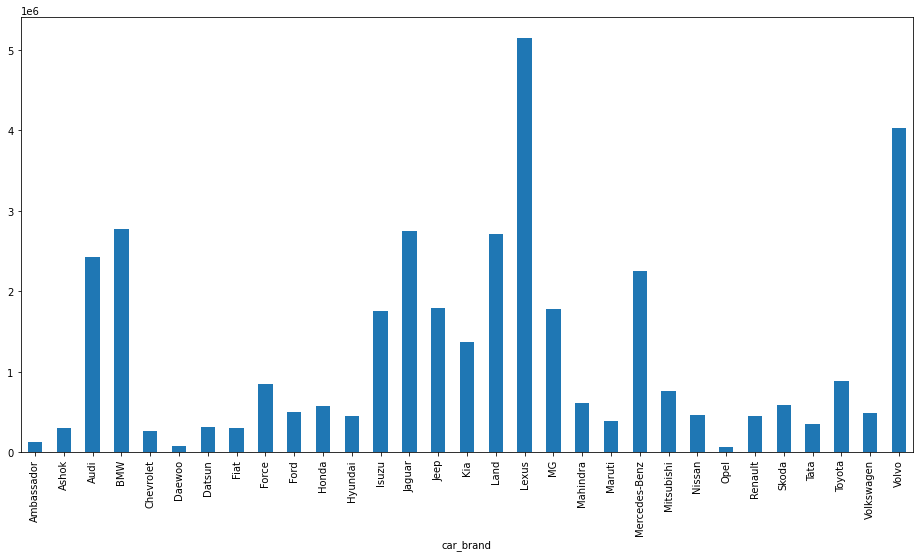

In [149]:
# Relation between car_brand and average price.
plt.figure(figsize=(16,8))
df.groupby("car_brand").mean()["selling_price"].plot(kind = "bar")
plt.show()

Lexus has highest average selling price

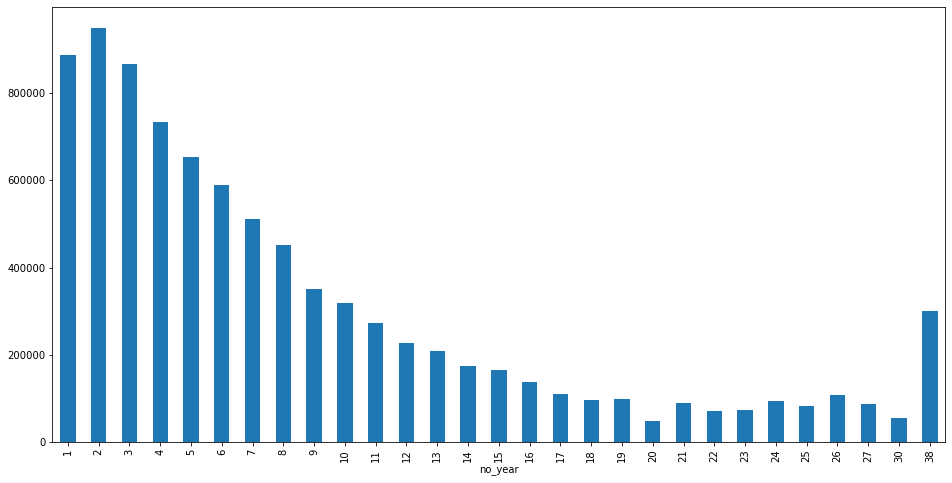

In [151]:
# Relation between no_years and average selling price.
plt.figure(figsize=(16,8))
df.groupby("no_year").mean()["selling_price"].plot(kind = "bar")
plt.show()

As number of years decreases average car selling price decreases.

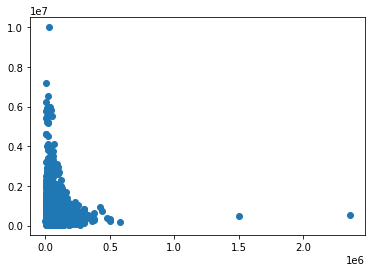

In [153]:
# Relation between km_driven and average selling price.
plt.scatter(df["km_driven"], df["selling_price"])
plt.show()

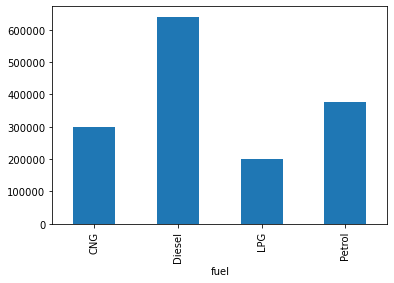

In [156]:
# Relation between fuel and average selling price.
df.groupby("fuel").mean()["selling_price"].plot(kind = "bar")
plt.show()

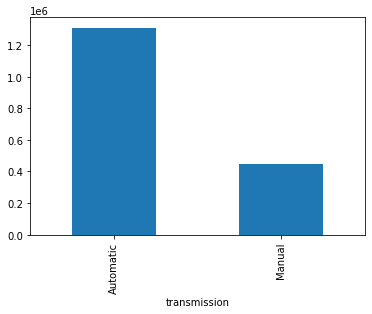

In [165]:
# Relation between seller_type and average selling price.
df.groupby("transmission").mean()["selling_price"].plot(kind = "bar")
plt.show()

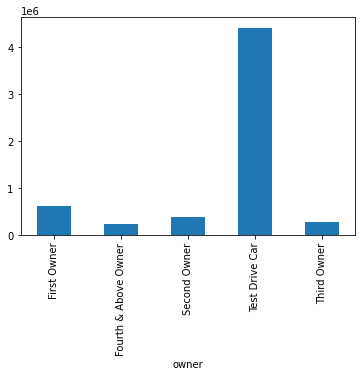

In [166]:
# Relation between owner and average selling price.
df.groupby("owner").mean()["selling_price"].plot(kind = "bar")
plt.show()

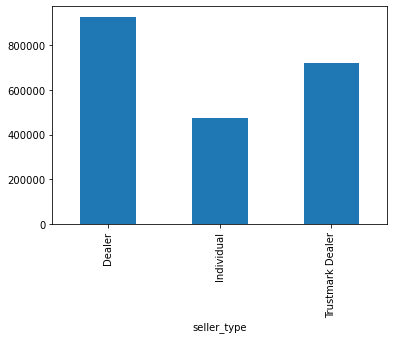

In [159]:
# Relation between seller_tye and average selling price.
df.groupby("seller_type").mean()["selling_price"].plot(kind = "bar")
plt.show()

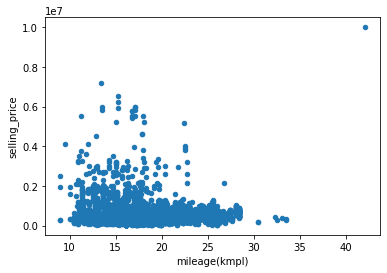

In [162]:
# Relation between mileage and average selling price.
df.plot(kind = "scatter", x = "mileage(kmpl)", y = "selling_price")
plt.show()

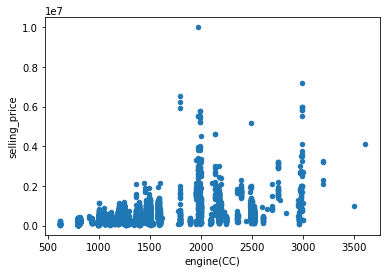

In [163]:
# Relation between engine(CC) and average selling price.
df.plot(kind = "scatter", x = "engine(CC)", y = "selling_price")
plt.show()

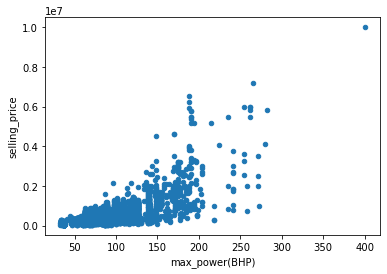

In [164]:
# Relation between max_power(BHP) and average selling price.
df.plot(kind = "scatter", x = "max_power(BHP)", y = "selling_price")
plt.show()

## One Hot Encoding

In [176]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,no_year,selling_price,km_driven,mileage(kmpl),engine(CC),max_power(BHP),torque(Nm),torque_lower(rpm),torque_upper(rpm),seats,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,7,450000,145500,23.4,1248.0,74.0,190.00,2000.0,2000.0,5.0,...,1,0,0,1,0,1,0,0,0,0
4,14,130000,120000,16.1,1298.0,88.2,112.70,4500.0,4500.0,5.0,...,0,0,1,1,0,1,0,0,0,0
6,14,96000,175000,17.3,1061.0,57.5,76.44,4500.0,4500.0,5.0,...,0,1,0,1,0,1,0,0,0,0
7,20,45000,5000,16.1,796.0,37.0,59.00,2500.0,2500.0,4.0,...,0,0,1,1,0,1,0,1,0,0
11,16,92000,100000,17.3,993.0,60.0,78.00,4500.0,4500.0,5.0,...,0,0,1,1,0,1,0,1,0,0


In [177]:
# X --> Independent variable, y --> Target variable
X = df.drop(columns = ["selling_price"]).copy()
y = df["selling_price"].copy()

In [178]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

In [179]:
X_train.shape, X_test.shape

((5524, 49), (1382, 49))

In [181]:
y_train.shape, y_test.shape

((5524,), (1382,))

## Model Building

In [185]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)
y_pred = reg_model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:" ,mean_absolute_error(y_test, y_pred))
print("MSE:" ,mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 132832.9605707173
MSE: 63704887388.25981
RMSE: 252398.2713654351
R2 Score: 0.7279901307460326


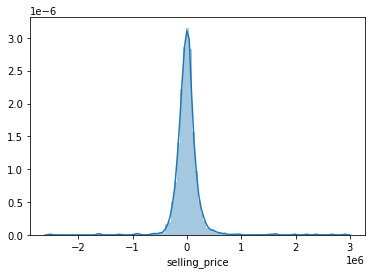

In [202]:
sns.distplot(y_test-y_pred, bins = 100)
plt.show()

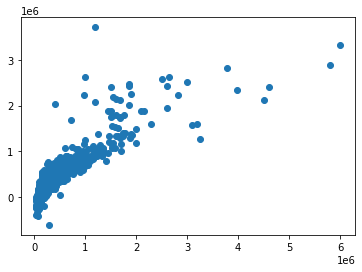

In [197]:
# Checking for Homoscedasticity
plt.scatter(y_test, y_pred)
plt.show()

In [207]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)
y_pred = dtr_model.predict(X_test)
print("MAE:" ,mean_absolute_error(y_test, y_pred))
print("MSE:" ,mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 94539.6923540762
MSE: 26777195272.877533
RMSE: 163637.38959320248
R2 Score: 0.8856655794590467


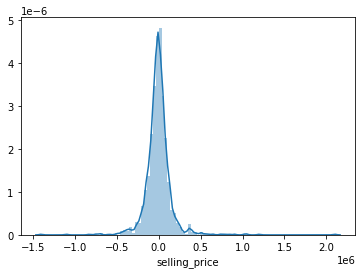

In [208]:
sns.distplot(y_test-y_pred, bins = 100)
plt.show()

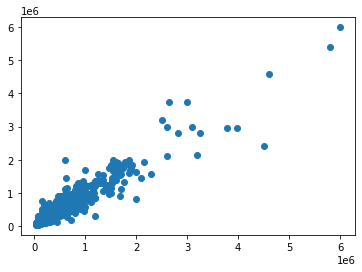

In [209]:
# Checking for Homoscedasticity
plt.scatter(y_test, y_pred)
plt.show()

We can see decision tree is giving better performance compared to linear regression

In [210]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)
print("MAE:" ,mean_absolute_error(y_test, y_pred))
print("MSE:" ,mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 74210.30140401378
MSE: 18847403914.2546
RMSE: 137285.84746525987
R2 Score: 0.9195245438038729


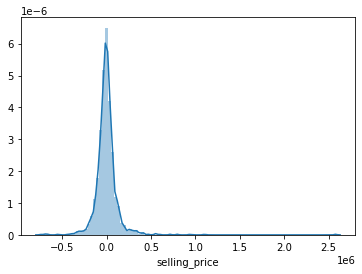

In [211]:
sns.distplot(y_test-y_pred, bins = 100)
plt.show()

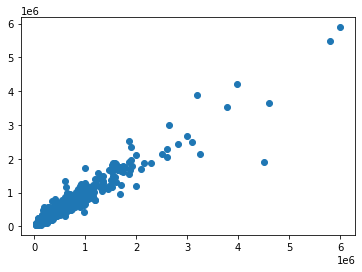

In [212]:
# Checking for Homoscedasticity
plt.scatter(y_test, y_pred)
plt.show()

Random Forest is giving better performance than Decision tree.

In [215]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
print("MAE:" ,mean_absolute_error(y_test, y_pred))
print("MSE:" ,mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 84359.19701400372
MSE: 20993823545.432106
RMSE: 144892.45510181718
R2 Score: 0.910359668906875


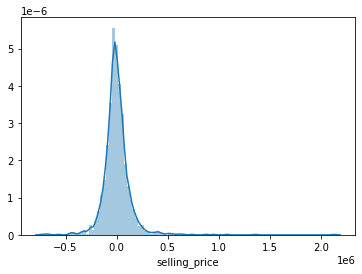

In [216]:
sns.distplot(y_test-y_pred, bins = 100)
plt.show()

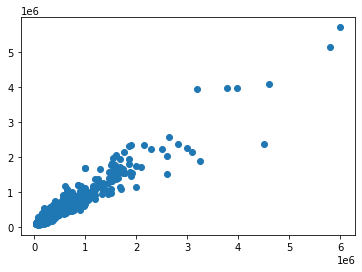

In [217]:
# Checking for Homoscedasticity
plt.scatter(y_test, y_pred)
plt.show()

In [231]:
# XGBoost
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("MAE:" ,mean_absolute_error(y_test, y_pred))
print("MSE:" ,mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 71105.9119652225
MSE: 16260033139.750729
RMSE: 127514.83497911421
R2 Score: 0.9305722108658202


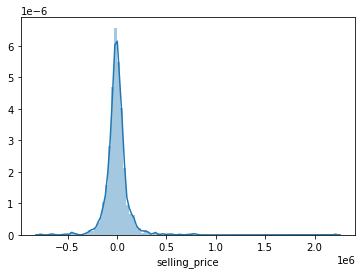

In [221]:
sns.distplot(y_test-y_pred, bins = 100)
plt.show()

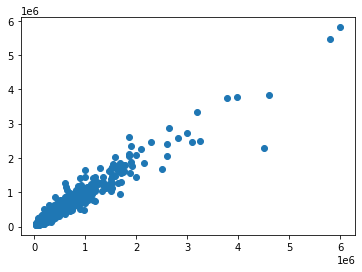

In [223]:
# Checking for Homoscedasticity
plt.scatter(y_test, y_pred)
plt.show()

Performance of XGBoost is better compared to rest of the models.
<br>So, lets tune XGBoost model to get more performance if possible. 

### Tuning XGBoost model with cross validation

In [226]:
from sklearn.model_selection import cross_val_score, KFold

In [230]:
errors = cross_val_score(estimator = XGBRegressor(),
                         X = X_train,
                         y = y_train,
                         scoring = "neg_root_mean_squared_error",
                         verbose = 3,
                         cv = KFold(n_splits = 10, shuffle = True))
np.mean(errors)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .............................. , score=-139063.017, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .............................. , score=-272051.357, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .............................. , score=-188415.240, total=   0.3s
[CV]  ................................................................
[CV] .............................. , score=-144128.742, total=   0.4s
[CV]  ................................................................
[CV] .............................. , score=-217257.481, total=   0.3s
[CV]  ................................................................
[CV] .............................. , score=-125113.882, total=   0.3s
[CV]  ................................................................
[CV] .............................. , score=-144157.840, total=   0.3s
[CV]  ................................................................
[CV] .............................. , score=-136901.669, total=   0.3s
[CV]  ................................................................
[CV] .............................. , score=-172586.720, total=   0.4s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.3s finished


-167551.87918699245

So with 10 fold cross validation we are getting average error of -167551.87.

In [242]:
# Using Grid Search to Tune the parameters of XGBoost model
from sklearn.model_selection import GridSearchCV

# Round - 1
# parameters = {"n_estimators" : [50, 100, 150, 200],
#               "max_depth" : [5,10,15,20]}

# model = GridSearchCV(estimator = XGBRegressor(),
#                      param_grid = parameters,
#                      cv = KFold(n_splits = 10),
#                      scoring = "neg_root_mean_squared_error",
#                      verbose = 3)
# model.fit(X_train, y_train)
# After Round-1 Best Parameters are n_estimators = 100 and max_depth = 5, score = -158489.93548712082
# So we have improved from -167551.87918699245 to -158489.93548712082

# Round - 2
# parameters = {"learning_rate" : [0.1,0.2,0.3,0.4],
#               "subsample": [0.7,0.8,0.9]}

# model = GridSearchCV(estimator = XGBRegressor(n_estimators = 50, max_depth = 5),
#                      param_grid = parameters,
#                      cv = KFold(n_splits = 10),
#                      scoring = "neg_root_mean_squared_error",
#                      verbose = 3)
# model.fit(X_train, y_train)
# After Round-1 Best Parameters are learning_rate = 0.3 and subsample = 0.8, score = -157333.16192566045
# So we have improved from -158489.93548712082 to -157333.16192566045

# Round - 3
parameters = {"reg_alpha" : [1,2,3,4],
              "reg_lambda": [1,2,3,4]}

model = GridSearchCV(estimator = XGBRegressor(n_estimators = 50, max_depth = 5,
                                              learning_rate = 0.3, subsample = 0.8),
                     param_grid = parameters,
                     cv = KFold(n_splits = 10),
                     scoring = "neg_root_mean_squared_error",
                     verbose = 3)
model.fit(X_train, y_train)
# After Round-1 Best Parameters are reg_alpha = 3 and reg_lambda = 1, score = -157333.16192566045
# So we have same score this time -157333.16192566045

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] reg_alpha=1, reg_lambda=1 .......................................
[CV] ..... reg_alpha=1, reg_lambda=1, score=-134759.170, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] reg_alpha=1, reg_lambda=1 .......................................
[CV] ..... reg_alpha=1, reg_lambda=1, score=-130122.394, total=   0.2s
[CV] reg_alpha=1, reg_lambda=1 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ..... reg_alpha=1, reg_lambda=1, score=-142815.240, total=   0.2s
[CV] reg_alpha=1, reg_lambda=1 .......................................
[CV] ..... reg_alpha=1, reg_lambda=1, score=-180386.721, total=   0.2s
[CV] reg_alpha=1, reg_lambda=1 .......................................
[CV] ..... reg_alpha=1, reg_lambda=1, score=-151409.463, total=   0.2s
[CV] reg_alpha=1, reg_lambda=1 .......................................
[CV] ..... reg_alpha=1, reg_lambda=1, score=-124389.204, total=   0.2s
[CV] reg_alpha=1, reg_lambda=1 .......................................
[CV] ..... reg_alpha=1, reg_lambda=1, score=-149743.828, total=   0.2s
[CV] reg_alpha=1, reg_lambda=1 .......................................
[CV] ..... reg_alpha=1, reg_lambda=1, score=-155145.067, total=   0.2s
[CV] reg_alpha=1, reg_lambda=1 .......................................
[CV] ..... reg_alpha=1, reg_lambda=1, score=-131340.282, total=   0.2s
[CV] reg_alpha=1, reg_lambda=1 .......................................
[CV] .

[CV] ..... reg_alpha=2, reg_lambda=3, score=-159215.420, total=   0.2s
[CV] reg_alpha=2, reg_lambda=3 .......................................
[CV] ..... reg_alpha=2, reg_lambda=3, score=-133682.461, total=   0.2s
[CV] reg_alpha=2, reg_lambda=3 .......................................
[CV] ..... reg_alpha=2, reg_lambda=3, score=-171267.901, total=   0.2s
[CV] reg_alpha=2, reg_lambda=3 .......................................
[CV] ..... reg_alpha=2, reg_lambda=3, score=-167896.632, total=   0.2s
[CV] reg_alpha=2, reg_lambda=3 .......................................
[CV] ..... reg_alpha=2, reg_lambda=3, score=-126603.209, total=   0.2s
[CV] reg_alpha=2, reg_lambda=3 .......................................
[CV] ..... reg_alpha=2, reg_lambda=3, score=-147870.437, total=   0.2s
[CV] reg_alpha=2, reg_lambda=3 .......................................
[CV] ..... reg_alpha=2, reg_lambda=3, score=-198437.976, total=   0.2s
[CV] reg_alpha=2, reg_lambda=3 .......................................
[CV] .

[CV] ..... reg_alpha=3, reg_lambda=4, score=-277184.617, total=   0.2s
[CV] reg_alpha=4, reg_lambda=1 .......................................
[CV] ..... reg_alpha=4, reg_lambda=1, score=-134759.180, total=   0.2s
[CV] reg_alpha=4, reg_lambda=1 .......................................
[CV] ..... reg_alpha=4, reg_lambda=1, score=-130122.388, total=   0.2s
[CV] reg_alpha=4, reg_lambda=1 .......................................
[CV] ..... reg_alpha=4, reg_lambda=1, score=-142815.223, total=   0.2s
[CV] reg_alpha=4, reg_lambda=1 .......................................
[CV] ..... reg_alpha=4, reg_lambda=1, score=-180386.689, total=   0.2s
[CV] reg_alpha=4, reg_lambda=1 .......................................
[CV] ..... reg_alpha=4, reg_lambda=1, score=-151409.440, total=   0.2s
[CV] reg_alpha=4, reg_lambda=1 .......................................
[CV] ..... reg_alpha=4, reg_lambda=1, score=-124389.191, total=   0.2s
[CV] reg_alpha=4, reg_lambda=1 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   27.3s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.3, max_delta_step=None,
                                    max_depth=5, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=50, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=0.8,
                      

In [246]:
model.best_params_

{'reg_alpha': 3, 'reg_lambda': 1}

In [247]:
model.best_score_

-157333.1493572723

In [258]:
# Retraining model again with with parameters we got by tuning.
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators = 100, max_depth = 5,
                         learning_rate = 0.3, subsample = 0.8,
                         reg_lambda = 1, reg_alpha = 3)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("MAE:" ,mean_absolute_error(y_test, y_pred))
print("MSE:" ,mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 73704.47121613829
MSE: 15736484689.471542
RMSE: 125445.14613755107
R2 Score: 0.9328076805659802


we can see RMSE decreased from 127514.83497911421 to 125445.14613755107 (Before tuning and after tuning)

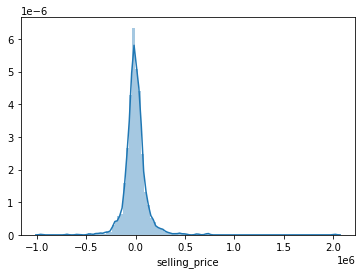

In [259]:
sns.distplot(y_test-y_pred, bins = 100)
plt.show()

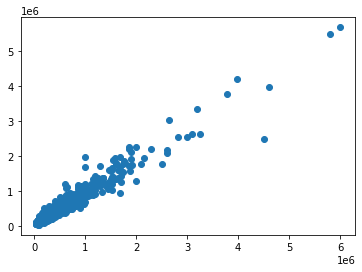

In [260]:
# Checking for Homoscedasticity
plt.scatter(y_test, y_pred)
plt.show()

In [261]:
# Saving the model in pkl format
import pickle
file = open("car_price_model.pkl", mode = "wb")
pickle.dump(xgb_model, file)